# Exercise 1

### A. Distiguishing pixels

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle
import psutil
from pathlib import Path
import os

# CaImAn funtions and objects
import caiman as cm
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF

import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import auxiliary_functions as aux


import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5)

In [2]:
# download data for the lesson (this can take a few minutes)
download_data('https://surfdrive.surf.nl/files/index.php/s/HeYXPdvMO87fbq7')

In [3]:
# set path to video of the full field of view
input_tif_file_path_FOV = 'data/calcium_video.tif'   
input_tif_file_path = 'data/caiman_video_trial_0.tif' 

In [4]:
FOV = cm.load(input_tif_file_path_FOV) # load video with complete field of view (FOV)
ROI = cm.load(input_tif_file_path) #shape = (500,300,400) 500 frames, with 300x400 pixels

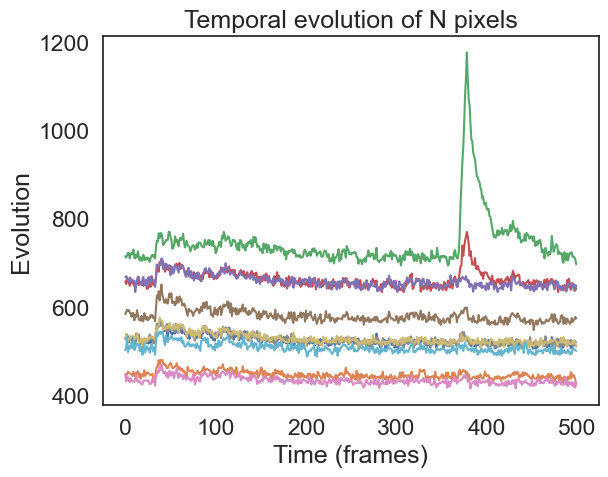

In [19]:
#pick N random pixels (300x400) and plot it for 500 time frames. 
N = 10
x_pixels = np.random.randint(0,300,N)
y_pixels = np.random.randint(0,400,N)
data = np.zeros([500,N])
for i in range(N):
    for j in range(N):
        data[:,i] = ROI[:,x_pixels[i],y_pixels[j]]

plt.plot(data)
plt.title('Temporal evolution of N pixels')
plt.xlabel('Time (frames)')
plt.ylabel('Evolution')
plt.show()

### B. Temporal statistics

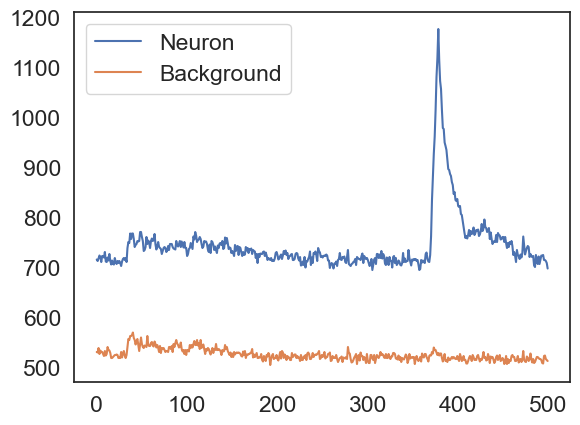

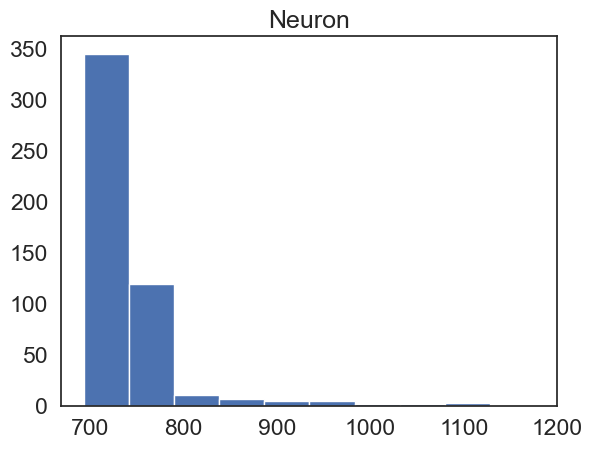

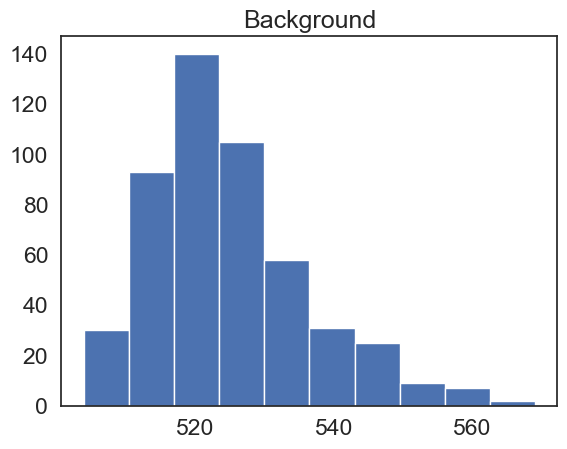

In [24]:
plt.plot(data[:,2], label='Neuron')
plt.plot(data[:,0], label='Background')
plt.legend()
plt.show()

plt.hist(data[:,2])
plt.title('Neuron')
plt.show()

plt.hist(data[:,0])
plt.title('Background')
plt.show()

All the pixels have the same sort of distribution, but with the peak at a different value. However, one trace shows a very different behavior around $t \approx 380$ with a very big peak. This results in a distribution which is different from the other neurons. 

The raw data is very large. If you would have to look at the temporal data of all 300x400 pixels, it would take a very long time. 